In [1]:
import matplotlib
import pandas as pd
import numpy as np
import csv
import re
%matplotlib inline 
import matplotlib.pyplot as plt

## Predictions of transmembrane helix domain with TMHMM2.0

Fasta file for the full human genome was runned on:
http://www.cbs.dtu.dk/services/TMHMM-2.0/

User guide:
http://www.cbs.dtu.dk/services/TMHMM-2.0/TMHMM2.0.guide.html#output

### Columns descriptions:
- "len=": the length of the protein sequence.
- "ExpAA=": The expected number of amino acids intransmembrane helices (see above).
- "First60=": The expected number of amino acids in transmembrane helices in the first 60 amino acids of the protein (see above).
- "PredHel=": The number of predicted transmembrane helices by N-best.
- "Topology=": The topology predicted by N-best.

The topology is given as the position of the transmembrane helices separated by 'i' if the loop is on the inside or 'o' if it is on the outside. The above example 'i7-29o44-66i87-109o' means that it starts on the inside, has a predicted TMH at position 7 to 29, the outside, then a TMH at position 44-66 etc.

In [23]:
# Loading transmembrane helix domain data
TMD = pd.read_table('data/TMHMM_result.txt', delim_whitespace=True, header=None)
TMD.head()

,0,1,2,3,4,5
0,sp|Q96IY4|CBPB2_HUMAN,len=423,ExpAA=2.22,First60=1.15,PredHel=0,Topology=o
1,sp|P22362|CCL1_HUMAN,len=96,ExpAA=0.07,First60=0.07,PredHel=0,Topology=o
2,sp|Q8NCR9|CLRN3_HUMAN,len=226,ExpAA=90.50,First60=22.95,PredHel=4,Topology=i13-35o94-116i129-151o179-201i
3,sp|Q8IUK8|CBLN2_HUMAN,len=224,ExpAA=9.17,First60=8.91,PredHel=0,Topology=o
4,sp|Q9BX69|CARD6_HUMAN,len=1037,ExpAA=0.00,First60=0.00,PredHel=0,Topology=o


In [24]:
TMD = TMD.rename(columns={0: 'Protein Id', 1:'len', 2: 'ExpAA', 
                       3: 'First60', 4: 'PredHel', 5: 'Topology'})
TMD.head()

,Protein Id,len,ExpAA,First60,PredHel,Topology
0,sp|Q96IY4|CBPB2_HUMAN,len=423,ExpAA=2.22,First60=1.15,PredHel=0,Topology=o
1,sp|P22362|CCL1_HUMAN,len=96,ExpAA=0.07,First60=0.07,PredHel=0,Topology=o
2,sp|Q8NCR9|CLRN3_HUMAN,len=226,ExpAA=90.50,First60=22.95,PredHel=4,Topology=i13-35o94-116i129-151o179-201i
3,sp|Q8IUK8|CBLN2_HUMAN,len=224,ExpAA=9.17,First60=8.91,PredHel=0,Topology=o
4,sp|Q9BX69|CARD6_HUMAN,len=1037,ExpAA=0.00,First60=0.00,PredHel=0,Topology=o


In [25]:
TMD.shape

(20364, 6)

In [26]:
TMD['len'] = TMD['len'].map(lambda x: x.replace('len=', ''))
TMD['ExpAA'] = TMD['ExpAA'].map(lambda x: x.replace('ExpAA=', ''))
TMD['First60'] = TMD['First60'].map(lambda x: x.replace('First60=', ''))
TMD['PredHel'] = TMD['PredHel'].map(lambda x: x.replace('PredHel=', ''))
TMD['Topology'] = TMD['Topology'].map(lambda x: x.replace('Topology=', ''))
TMD['Topology'] = TMD['Topology'].map(lambda x: re.findall('\d{1,}-\d{1,}', x))

In [27]:
TMD.head(10)

,Protein Id,len,ExpAA,First60,PredHel,Topology
0,sp|Q96IY4|CBPB2_HUMAN,423,2.22,1.15,0,[]
1,sp|P22362|CCL1_HUMAN,96,0.07,0.07,0,[]
2,sp|Q8NCR9|CLRN3_HUMAN,226,90.50,22.95,4,"[13-35, 94-116, 129-151, 179-201]"
3,sp|Q8IUK8|CBLN2_HUMAN,224,9.17,8.91,0,[]
4,sp|Q9BX69|CARD6_HUMAN,1037,0.00,0.00,0,[]
5,sp|Q8N7E2|CBLL2_HUMAN,425,0.00,0.00,0,[]
6,sp|Q8NEA5|CS018_HUMAN,215,33.88,10.99,2,"[7-29, 102-124]"
7,sp|P31327|CPSM_HUMAN,1500,0.05,0.01,0,[]
8,sp|Q3B7T3|BEAN1_HUMAN,259,22.99,22.98,1,[37-59]
9,sp|Q99933|BAG1_HUMAN,345,0.00,0.00,0,[]


## SignalIP5 Prediction

site: https://services.healthtech.dtu.dk/service.php?SignalP-5.0

papers: 
- https://www.nature.com/articles/s41587-019-0036-z
- https://academic.oup.com/peds/article/10/11/1241/1506251


Signal peptide and cleavage sites in gram+, gram- and eukaryotic amino acid sequences
The SignalP 5.0 server predicts the presence of signal peptides and the location of their cleavage sites in proteins from Archaea, Gram-positive Bacteria, Gram-negative Bacteria and Eukarya. In Bacteria and Archaea, SignalP 5.0 can discriminate between three types of signal peptides:

- Sec/SPI: "standard" secretory signal peptides transported by the Sec translocon and cleaved by Signal Peptidase I (Lep)
- Sec/SPII: lipoprotein signal peptides transported by the Sec translocon and cleaved by Signal Peptidase II (Lsp)
- Tat/SPI: Tat signal peptides transported by the Tat translocon and cleaved by Signal Peptidase I (Lep)

In [14]:
SP = pd.read_table('data/signalIP5_preds.txt')
SP.head()

,ID,Prediction,SP(Sec/SPI),OTHER,CS Position
0,sp_Q96IY4_CBPB2_HUMAN,SP(Sec/SPI),0.956504,0.043496,CS pos: 22-23. VFA-FQ. Pr: 0.8438
1,sp_P22362_CCL1_HUMAN,SP(Sec/SPI),0.998593,0.001407,CS pos: 23-24. VDS-KS. Pr: 0.8532
2,sp_Q8NCR9_CLRN3_HUMAN,OTHER,0.161518,0.838482,NaN
3,sp_Q8IUK8_CBLN2_HUMAN,SP(Sec/SPI),0.909754,0.090246,CS pos: 51-52. VRA-QN. Pr: 0.8563
4,sp_Q9BX69_CARD6_HUMAN,OTHER,0.000208,0.999792,NaN


In [21]:
SP.dtypes


ID              object
Prediction      object
SP(Sec/SPI)    float64
OTHER          float64
CS Position     object
dtype: object

In [22]:
SP['CS Position'] = SP['CS Position'].astype(str).map(lambda x: re.findall('\d{1,}-\d{1,}', x))
SP.head()

,ID,Prediction,SP(Sec/SPI),OTHER,CS Position
0,sp_Q96IY4_CBPB2_HUMAN,SP(Sec/SPI),0.956504,0.043496,[22-23]
1,sp_P22362_CCL1_HUMAN,SP(Sec/SPI),0.998593,0.001407,[23-24]
2,sp_Q8NCR9_CLRN3_HUMAN,OTHER,0.161518,0.838482,[]
3,sp_Q8IUK8_CBLN2_HUMAN,SP(Sec/SPI),0.909754,0.090246,[51-52]
4,sp_Q9BX69_CARD6_HUMAN,OTHER,0.000208,0.999792,[]


In [15]:
set(SP['Prediction'])

{'OTHER', 'SP(Sec/SPI)'}

## Loading MS compartment Prediction dataset 

In [2]:
df = pd.read_csv('data/Dataset_onlyPredict.csv', sep="\t")
df.head()

,Lead Protein ID,Compartment Prediction,Prediction Confidence,Sequence
0,Q9BZC7,Endosome,Very High,MGFLHQLQLLLWKNVTLKRRSPWVLAFEIFIPLVLFFILLGLRQKK...
1,Q6RW13,Endosome,Very High,MELPAVNLKVILLGHWLLTTWGCIVFSGSYAWANFTILALGVWAVA...
2,Q9P2R3,Endosome,Very High,MAEEEVAKLEKHLMLLRQEYVKLQKKLAETEKRCALLAAQANKESS...
3,Q96NW4,Endosome,Very High,MALYDEDLLKNPFYLALQKCRPDLCSKVAQIHGIVLVPCKGSLSSS...
4,O00203,Endosome,Very High,MSSNSFPYNEQSGGGEATELGQEATSTISPSGAFGLFSSDLKKNED...


In [3]:
print(df.columns)

Index(['Lead Protein ID', 'Compartment Prediction', 'Prediction Confidence',
       'Sequence'],
      dtype='object')


In [4]:
lengh_seq = []
for seq in df["Sequence"]:
    lengh_seq.append(len(seq))
lengh_seq = np.asarray(lengh_seq)

In [5]:
df["Sequence Lengh"] = lengh_seq

In [6]:
df.head()

,Lead Protein ID,Compartment Prediction,Prediction Confidence,Sequence,Sequence Lengh
0,Q9BZC7,Endosome,Very High,MGFLHQLQLLLWKNVTLKRRSPWVLAFEIFIPLVLFFILLGLRQKK...,2435
1,Q6RW13,Endosome,Very High,MELPAVNLKVILLGHWLLTTWGCIVFSGSYAWANFTILALGVWAVA...,159
2,Q9P2R3,Endosome,Very High,MAEEEVAKLEKHLMLLRQEYVKLQKKLAETEKRCALLAAQANKESS...,1169
3,Q96NW4,Endosome,Very High,MALYDEDLLKNPFYLALQKCRPDLCSKVAQIHGIVLVPCKGSLSSS...,1050
4,O00203,Endosome,Very High,MSSNSFPYNEQSGGGEATELGQEATSTISPSGAFGLFSSDLKKNED...,1094


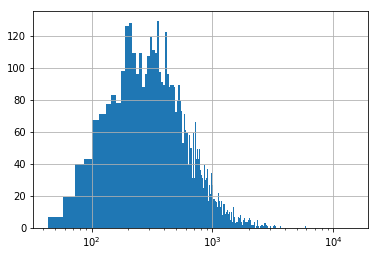

In [7]:
fig, ax = plt.subplots()
df['Sequence Lengh'].hist(ax=ax, bins=1000, bottom=0.1)
ax.set_xscale('log')

In [8]:
indexNames = df[ df['Sequence Lengh'] > 1500 ].index
 
# Delete these row indexes from dataFrame
df_short = df.drop(indexNames , inplace=False).reset_index(drop=True)
df_short.head()

,Lead Protein ID,Compartment Prediction,Prediction Confidence,Sequence,Sequence Lengh
0,Q6RW13,Endosome,Very High,MELPAVNLKVILLGHWLLTTWGCIVFSGSYAWANFTILALGVWAVA...,159
1,Q9P2R3,Endosome,Very High,MAEEEVAKLEKHLMLLRQEYVKLQKKLAETEKRCALLAAQANKESS...,1169
2,Q96NW4,Endosome,Very High,MALYDEDLLKNPFYLALQKCRPDLCSKVAQIHGIVLVPCKGSLSSS...,1050
3,O00203,Endosome,Very High,MSSNSFPYNEQSGGGEATELGQEATSTISPSGAFGLFSSDLKKNED...,1094
4,O14617,Endosome,Very High,MALKMVKGSIDRMFDKNLQDLVRGIRNHKEDEAKYISQCIDEIKQE...,1153


In [9]:
print(df_short.shape)
print(df.shape)

(4839, 5)
(5162, 5)


In [10]:
df_short.groupby(["Compartment Prediction"]).count()
# I will remove all the No Prediction rows

,Lead Protein ID,Prediction Confidence,Sequence,Sequence Lengh
Compartment Prediction,,,,
Actin binding proteins,81,81,81,81
ER,508,508,508,508
ER_high_curvature,45,45,45,45
Endosome,283,283,283,283
Ergic/cisGolgi,69,69,69,69
Golgi,178,178,178,178
Large Protein Complex,2409,2409,2409,2409
Lysosome,87,87,87,87
Mitochondrion,654,654,654,654


In [11]:
df_short["Compartment Prediction"].value_counts() / len(df) *100

Large Protein Complex     46.667958
Mitochondrion             12.669508
ER                         9.841147
Plasma membrane            9.259977
Endosome                   5.482371
Golgi                      3.448276
Lysosome                   1.685393
Actin binding proteins     1.569159
Ergic/cisGolgi             1.336691
ER_high_curvature          0.871755
Peroxisome                 0.484308
Nuclear pore complex       0.426191
Name: Compartment Prediction, dtype: float64

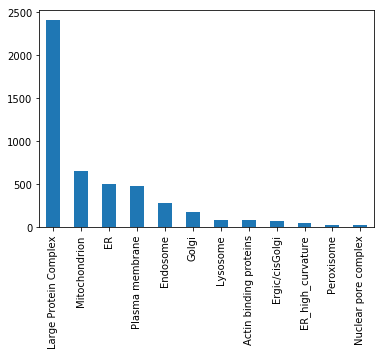

In [12]:
df_short['Compartment Prediction'].value_counts().plot.bar()

In [17]:
df_short.groupby(["Compartment Prediction", "Prediction Confidence"]).count()

Lead Protein ID  Sequence  \
Compartment Prediction Prediction Confidence                              
Actin binding proteins High                                17        17   
                       Low                                 20        20   
                       Medium                              24        24   
                       Very High                            5         5   
                       Very Low                            15        15   
ER                     High                               126       126   
                       Low                                 48        48   
                       Medium                              85        85   
                       Very High                          211       211   
                       Very Low                            38        38   
ER_high_curvature      High                                 7         7   
                       Low                                  9         9   
                       Medium                              14        14   
                       Very High                            8         8   
                       Very Low                             7         7   
Endosome               High                                41        41   
                       Low                                 56        56   
                       Medium                              55        55   
                       Very High                           95        95   
                       Very Low                            36        36   
Ergic/cisGolgi         High                                12        12   
                       Low                                 13        13   
                       Medium                              21        21   
                       Very High                           13        13   
                       Very Low                            10        10   
Golgi                  High                                28        28   
                       Low                                 36        36   
                       Medium                              68        68   
                       Very High                           12        12   
                       Very Low                            34        34   
Large Protein Complex  High                               485       485   
                       Low                                221       221   
                       Medium                             397       397   
                       Very High                         1042      1042   
                       Very Low                           264       264   
Lysosome               High                                20        20   
                       Low                                  8         8   
                       Medium                              16        16   
                       Very High                           41        41   
                       Very Low                             2         2   
Mitochondrion          High                               371       371   
                       Low                                 55        55   
                       Medium                             170       170   
                       Very High                            7         7   
                       Very Low                            51        51   
Nuclear pore complex   High                                10        10   
                       Low                                  4         4   
                       Medium                               2         2   
                       Very High                            3         3   
                       Very Low                             3         3   
Peroxisome             High                                 6         6   
                       Low                                  5         5

## Spliting the Dataset

In [18]:
# Stratified Sampling

# might be better for rare categories

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.15, random_state=42)
for train_index, test_index in split.split(df_short, df_short["Compartment Prediction"]):
    trainVal_set = df_short.loc[train_index]
    test_set = df_short.loc[test_index]

In [19]:
trainVal = trainVal_set.reset_index(drop=True)

split = StratifiedShuffleSplit(n_splits=1, test_size=0.15, random_state=42)
for train_index, valid_index in split.split(trainVal, trainVal["Compartment Prediction"]):
    train_set = trainVal.loc[train_index]
    valid_set = trainVal.loc[valid_index]

In [20]:
test_set["Compartment Prediction"].value_counts() / len(test_set) *100

Large Protein Complex     49.724518
Mitochondrion             13.498623
ER                        10.468320
Plasma membrane            9.917355
Endosome                   5.922865
Golgi                      3.719008
Lysosome                   1.790634
Actin binding proteins     1.652893
Ergic/cisGolgi             1.377410
ER_high_curvature          0.964187
Peroxisome                 0.550964
Nuclear pore complex       0.413223
Name: Compartment Prediction, dtype: float64

In [21]:
train_set["Compartment Prediction"].value_counts() / len(train_set) *100

Large Protein Complex     49.799771
Mitochondrion             13.529748
ER                        10.497712
Plasma membrane            9.868421
Endosome                   5.835240
Golgi                      3.661327
Lysosome                   1.802059
Actin binding proteins     1.687643
Ergic/cisGolgi             1.430206
ER_high_curvature          0.915332
Peroxisome                 0.514874
Nuclear pore complex       0.457666
Name: Compartment Prediction, dtype: float64

In [22]:
valid_set["Compartment Prediction"].value_counts() / len(valid_set) *100

Large Protein Complex     49.756888
Mitochondrion             13.452188
ER                        10.534846
Plasma membrane            9.886548
Endosome                   5.834684
Golgi                      3.727715
Lysosome                   1.782820
Actin binding proteins     1.620746
Ergic/cisGolgi             1.458671
ER_high_curvature          0.972447
Peroxisome                 0.486224
Nuclear pore complex       0.486224
Name: Compartment Prediction, dtype: float64

In [23]:
train_set.to_csv(path_or_buf= "data/12C_train.csv", sep="\t", index=False)
valid_set.to_csv(path_or_buf= "data/12C_valid.csv", sep="\t", index=False)
test_set.to_csv(path_or_buf="data/12C_test.csv", sep="\t", index=False)